## AIM:

* **To explore if the medium of submitting a complaint has any significance on the product type and if including this feature in bulding classification models could help improve the accuracy and F1 score.**
* **To understand if the complaints with missing narratives has any inderlying patterns.**
* **To analyse the most significant words of complaint narratives pertaining to different target type.**


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("complaints.csv")
df.shape

/Users/ram/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(3096756, 18)

# 'Submitted via' FEATURE ANALYSIS:

In [9]:
df['Submitted via'].value_counts()

Web             2599864
Referral         237225
Phone            146933
Postal mail       86200
Fax               25660
Web Referral        450
Email               424
Name: Submitted via, dtype: int64

In [148]:
237225/3096756

0.07660435630059327

<AxesSubplot:ylabel='Product'>

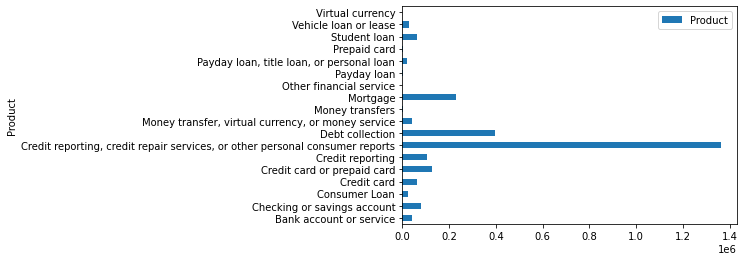

In [29]:
df[df['Submitted via'] == "Web"].groupby('Product').agg({'Product':'size'}).plot.barh(y='Product')

<AxesSubplot:ylabel='Product'>

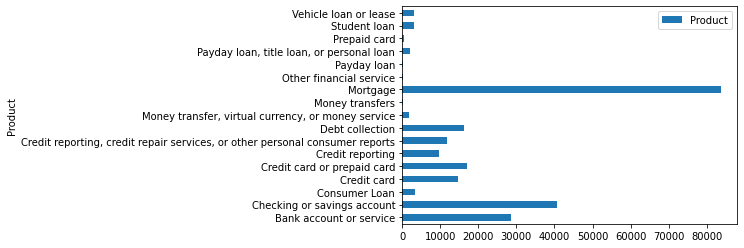

In [30]:
df[df['Submitted via'] == "Referral"].groupby('Product').agg({'Product':'size'}).plot.barh(y='Product')

<AxesSubplot:ylabel='Product'>

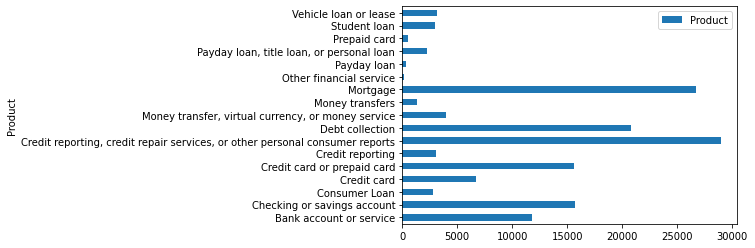

In [32]:
df[df['Submitted via'] == "Phone"].groupby('Product').agg({'Product':'size'}).plot.barh(y='Product')

<AxesSubplot:ylabel='Product'>

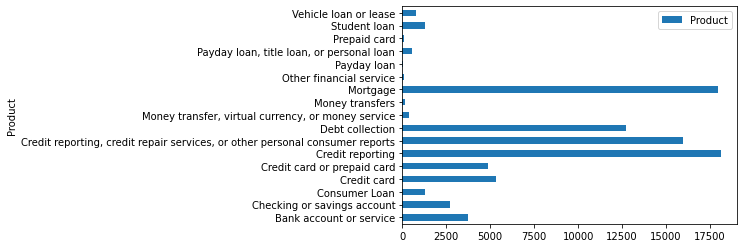

In [33]:
df[df['Submitted via'] == "Postal mail"].groupby('Product').agg({'Product':'size'}).plot.barh(y='Product')

<AxesSubplot:ylabel='Product'>

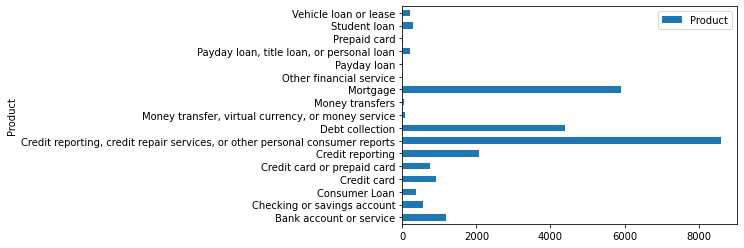

In [34]:
df[df['Submitted via'] == "Fax"].groupby('Product').agg({'Product':'size'}).plot.barh(y='Product')

<AxesSubplot:ylabel='Product'>

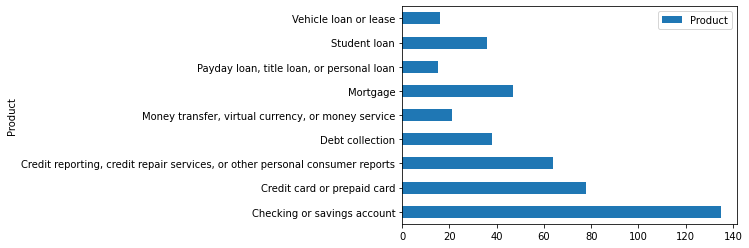

In [35]:
df[df['Submitted via'] == "Web Referral"].groupby('Product').agg({'Product':'size'}).plot.barh(y='Product')

<AxesSubplot:ylabel='Product'>

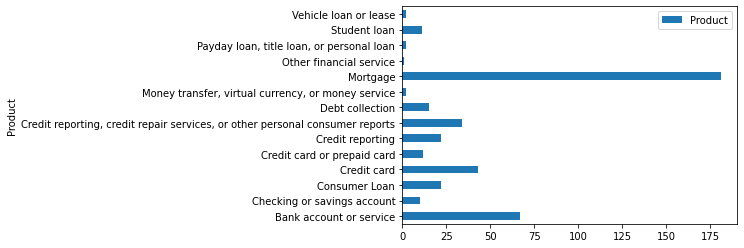

In [36]:
df[df['Submitted via'] == "Email"].groupby('Product').agg({'Product':'size'}).plot.barh(y='Product')

### SUMMARY:

* About 83% of the complaints are submitted via "Web". Whereas other mediums such as "Referral, Fax, Phone, Postal Mail, Email" accounts for only about 17%.
* Web: Most of the complaints are for Credit Reporting and Services.
* Referral: Most of the complaints are for Mortgages.
* Phone, Postal Mail, and Fax: Most of the complaints are for Credit Reporting and Mortgages.
* Web Referral: Most of the complaints are related checkings and savings account.
* Email: Most of the complaints are regarding mortgages and bank services.

## COMPLAINT NARRATIVE MISSING VALUE ANALYSIS

<AxesSubplot:ylabel='Product'>

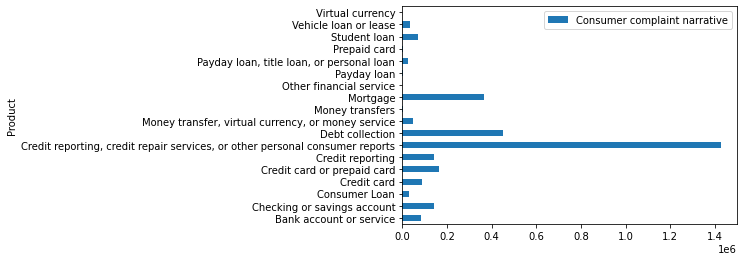

In [42]:
df.groupby("Product").agg({'Consumer complaint narrative':'size'}).plot.barh()

In [45]:
df[df['Consumer complaint narrative'].isna()]['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    913453
Mortgage                                                                        267348
Debt collection                                                                 260424
Credit reporting                                                                108842
Checking or savings account                                                      87516
Credit card or prepaid card                                                      83461
Bank account or service                                                          71321
Credit card                                                                      70352
Student loan                                                                     38784
Consumer Loan                                                                    22126
Money transfer, virtual currency, or money service                               21034
Vehicle loan or lease                      

In [46]:
df[df['Consumer complaint narrative'].isna()]['Submitted via'].value_counts()

Web             1487444
Referral         237225
Phone            146933
Postal mail       86200
Fax               25660
Web Referral        450
Email               424
Name: Submitted via, dtype: int64

In [56]:
a = df[df['Consumer complaint narrative'].isna()].groupby('Product').agg({'Product':'size'}).rename(columns={'Product':'Missing'}).reset_index()

In [58]:
b = df.groupby('Product').agg({'Product':'size'}).rename(columns={'Product':'Total'}).reset_index()

In [60]:
missing_df = b.merge(a)

In [61]:
missing_df['Percentage'] = missing_df['Missing']/missing_df['Total']

In [62]:
missing_df

Product    Total  Missing  \
0                             Bank account or service    86206    71321   
1                         Checking or savings account   141706    87516   
2                                       Consumer Loan    31596    22126   
3                                         Credit card    89190    70352   
4                         Credit card or prepaid card   165248    83461   
5                                    Credit reporting   140430   108842   
6   Credit reporting, credit repair services, or o...  1427733   913453   
7                                     Debt collection   452370   260424   
8   Money transfer, virtual currency, or money ser...    47590    21034   
9                                     Money transfers     5354     3857   
10                                           Mortgage   365096   267348   
11                            Other financial service     1058      766   
12                                        Payday loan     5543     3797   
13          Payday loan, title loan, or personal loan    25204    11641   
14                                       Prepaid card     3819     2369   
15                                       Student loan    71479    38784   
16                              Vehicle loan or lease    37116    17243   
17                                   Virtual currency       18        2   

    Percentage  
0     0.827332  
1     0.617589  
2     0.700279  
3     0.788788  
4     0.505065  
5     0.775062  
6     0.639793  
7     0.575688  
8     0.441984  
9     0.720396  
10    0.732268  
11    0.724008  
12    0.685008  
13    0.461871  
14    0.620319  
15    0.542593  
16    0.464571  
17    0.111111

<AxesSubplot:xlabel='Percentage', ylabel='Product'>

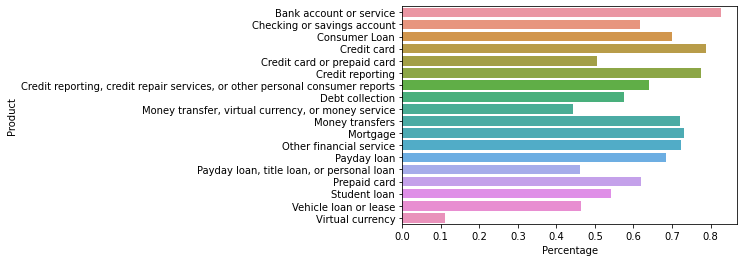

In [65]:
sns.barplot(data=missing_df, x="Percentage", y="Product")

In [68]:
df[~df['Consumer complaint narrative'].isna()].groupby('Product').agg({'Product':'size'}).rename(columns={'Product':'Total'}).reset_index()

Product   Total
0                             Bank account or service   14885
1                         Checking or savings account   54190
2                                       Consumer Loan    9470
3                                         Credit card   18838
4                         Credit card or prepaid card   81787
5                                    Credit reporting   31588
6   Credit reporting, credit repair services, or o...  514280
7                                     Debt collection  191946
8   Money transfer, virtual currency, or money ser...   26556
9                                     Money transfers    1497
10                                           Mortgage   97748
11                            Other financial service     292
12                                        Payday loan    1746
13          Payday loan, title loan, or personal loan   13563
14                                       Prepaid card    1450
15                                       Student loan   32695
16                              Vehicle loan or lease   19873
17                                   Virtual currency      16

### Summary:

* Bank Account type has the highest missing values of 82%.
* All product types have missing consumer narrative at least by 45% except for product type - virtual currency. 
* It can be inferred that only about half of the consumers chose to provide a complaint narrative. This could also siginify the importance of a complaint. 

## CONSUMER COMPLAINT - WORD ANALYIS on Preprocessed Data

In [1]:
from tqdm import tqdm
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("processed_complaints.csv")
df.shape

(1112420, 3)

In [28]:
products = df['Product'].unique()
products

array(['Debt Collection', 'Credit Reporting and Services',
       'Banking Services', 'Mortgages', 'Credit/Prepaid Cards', 'Loans',
       'Crypto Currency'], dtype=object)

In [123]:
class WordAnalysis:
    
    def __init__(self, df):
        
        self.product = []
        self.vocab_df = pd.DataFrame()
        self.df = df
        

    def getWords(self, product = 'Banking Services', top = 20):
        
        if self.vocab_df.empty == False:
            return self.vocab_df.head(top)
        vocab = {}
        words = []

        for x in tqdm(self.df[self.df['Product'] == product]['Complaint'].values):

            try:
                x = x.split(" ")
            except:
                continue

            for i in range(len(x)):

                if x[i] in vocab:
                    vocab[x[i]] += 1
                else:
                    vocab[x[i]] = 1

        vocab_df = pd.DataFrame(vocab.items(), columns=['Words', 'Count'])
        vocab_df = vocab_df.sort_values(by=['Count'], ascending=False).reset_index()
        self.vocab_df = vocab_df.drop(['index'],axis=1)
        self.product = product

        return self.vocab_df.head(top)

    def wordCloud(self, top=20):
        
        if self.vocab_df.empty:
            print("Run getWords(product, top) first.")
            return
        vocab_df = self.vocab_df.head(top)
        words = []
        m = vocab_df['Count'].min()
        for i, row in enumerate(vocab_df.values):
            row_words = [((row[0] + " "))] * int(row[1]/m)
            words+=row_words

        word_cloud = WordCloud(collocations = False, background_color = 'white').generate("".join(words))
        # Display the generated Word Cloud
        plt.imshow(word_cloud)
        plt.title(self.product)
        plt.axis("off")
        plt.show()
    

In [130]:
m = WordAnalysis(df)

In [131]:
m.getWords(products[0],20)

100%|██████████| 191946/191946 [00:06<00:00, 29622.12it/s]


Words   Count
0          debt  345929
1        credit  293883
2       account  256871
3    collection  170038
4        report  156948
5       company  144678
6   information  140170
7          call  107659
8        letter  101719
9      received   96463
10      payment   88823
11         time   87149
12    reporting   85528
13        would   85076
14        never   82186
15       agency   80306
16         sent   78252
17     consumer   77120
18       number   75067
19       called   72098

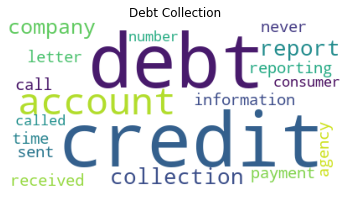

In [135]:
m.wordCloud(20)

In [136]:
m = WordAnalysis(df)
m.getWords(products[1],20)

100%|██████████| 545868/545868 [00:16<00:00, 32813.30it/s]


Words    Count
0        credit  1263045
1       account  1039124
2        report   822825
3   information   572378
4     reporting   525117
5      consumer   396548
6       section   256130
7       payment   246619
8       inquiry   225988
9        agency   223104
10       bureau   213648
11      company   201859
12       letter   198975
13          day   196533
14         date   191869
15         also   191844
16      dispute   188812
17       please   181018
18        right   179301
19         item   177610

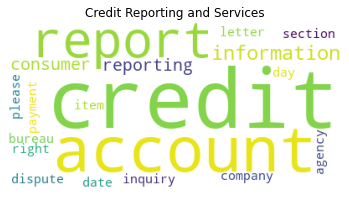

In [137]:
m.wordCloud(20)

In [138]:
m = WordAnalysis(df)
m.getWords(products[3],20)

100%|██████████| 97748/97748 [00:06<00:00, 15975.34it/s]


Words   Count
0        payment  244340
1           loan  227980
2       mortgage  217240
3          would  122093
4           time   99678
5           home   93619
6        account   85796
7           told   85701
8           bank   82281
9       received   82267
10         month   74427
11       company   74383
12          call   66724
13        letter   63655
14          sent   62466
15  modification   61536
16           day   61231
17           get   61092
18        called   59450
19             u   58842

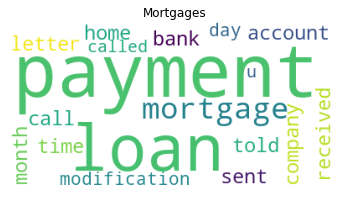

In [139]:
m.wordCloud(20)

In [140]:
m = WordAnalysis(df)
m.getWords(products[4],20)

100%|██████████| 102075/102075 [00:04<00:00, 20652.84it/s]


Words   Count
0       card  261345
1     credit  230482
2    account  198008
3    payment  118300
4      would   90749
5     charge   90636
6       bank   90353
7       time   77423
8       told   71290
9        one   69262
10    called   67647
11  received   65736
12   balance   61192
13       day   55994
14      call   54416
15       fee   51546
16     never   51242
17      back   50562
18     month   49370
19      made   48780

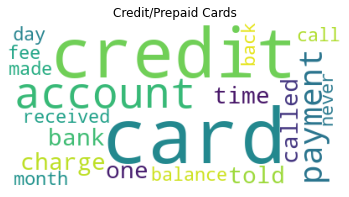

In [141]:
m.wordCloud(20)

In [142]:
m = WordAnalysis(df)
m.getWords(products[5],20)

100%|██████████| 77347/77347 [00:03<00:00, 20826.97it/s]


Words   Count
0       loan  205057
1    payment  186810
2      would   78589
3    account   77658
4     credit   75735
5       time   65134
6       told   59578
7        pay   52478
8      month   51937
9   interest   46239
10      call   46084
11    amount   44366
12       car   42902
13    called   42245
14   company   42156
15       due   40954
16       day   40681
17  received   40418
18       get   39775
19      year   39740

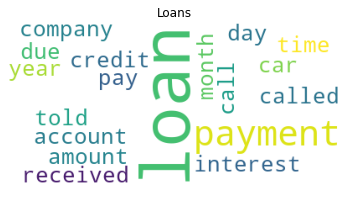

In [143]:
m.wordCloud(20)

In [144]:
m = WordAnalysis(df)
m.getWords(products[6],20)

100%|██████████| 16/16 [00:00<00:00, 6978.15it/s]


Words  Count
0      coinbase     40
1       account     29
2       support     21
3         bonus     19
4        signup     19
5         issue     15
6         money     15
7        please     12
8          sent     12
9   transaction     12
10      address     10
11      service     10
12          met      9
13      changed      9
14         back      9
15         time      9
16        email      8
17       unable      8
18       signed      8
19      request      8

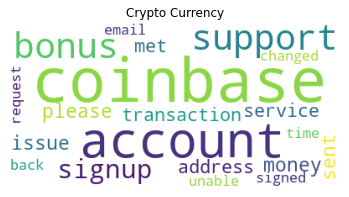

In [145]:
m.wordCloud(20)

### Summary:

*The list of preprocessed Product types:*
1. 'Debt Collection'
2. 'Credit Reporting and Services'
3. 'Banking Services', 'Mortgages'
4. 'Credit/Prepaid Cards'
5. 'Loans'
6. 'Crypto Currency'

The most frequently occured words in the complaint narratives differ per product types. The worldcloud images highligh the most frequent words pertaining to a particular product type.